In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn import preprocessing

#dataset owner:jerryyyyy708
#https://youtube.com/channel/UCLi9jBe_Jzo1vPjULRpCj7Q
data="YT_revenue.csv"

#load dataset and discard useless features
df=pd.read_csv(data,sep=',')
df=df.drop(columns=['Video title'])
df=df.drop(columns=['Video publish time'])
df=df.drop(columns=['Video'])
#df=df.drop(columns=['Dislikes'])
df=df.drop(columns=['Comments added'])
df=df.drop(columns=['Shares'])
#df=df.drop(columns=['Subscribers gained'])
#df=df.drop(columns=['Likes'])
df=df.dropna()
df=df.drop(df.index[-1])
df=df.drop(df.index[0])
df.drop(df[df['YouTube ad revenue (TWD)']==0].index,inplace=True)
df=shuffle(df,random_state=1)
labels=[]

#labeling the data with 4 levels
for i in df['YouTube ad revenue (TWD)']:
    if(i>=3000):
        labels.append(3)
    elif(i>=2000):
        labels.append(2)
    elif(i>=1000):
        labels.append(1)
    else:
        labels.append(0)
df

,Views,Watch time (hours),Likes,Dislikes,Subscribers gained,YouTube ad revenue (TWD)
40,27092,2688.2887,281,17,69,6459.366
171,13280,1350.8324,214,13,25,2868.319
95,14927,1356.4006,252,7,39,2095.873
63,22563,2140.9237,373,22,55,6851.408
200,8146,656.9761,120,3,15,1296.188
...,...,...,...,...,...,...
205,7183,649.7622,123,7,16,571.974
139,6134,827.1954,128,8,24,285.203
74,7638,675.5352,132,6,21,1568.767
142,14145,1406.9752,252,11,20,2842.604


accuracy: 0.6521739130434783
confusion matrix:
[[11  1  0  0]
 [ 1 17  3  1]
 [ 0  5  3  3]
 [ 0  2  8 14]]
precision score of each label [0.91666667 0.68       0.21428571 0.77777778]
recall score of each label [0.91666667 0.77272727 0.27272727 0.58333333]


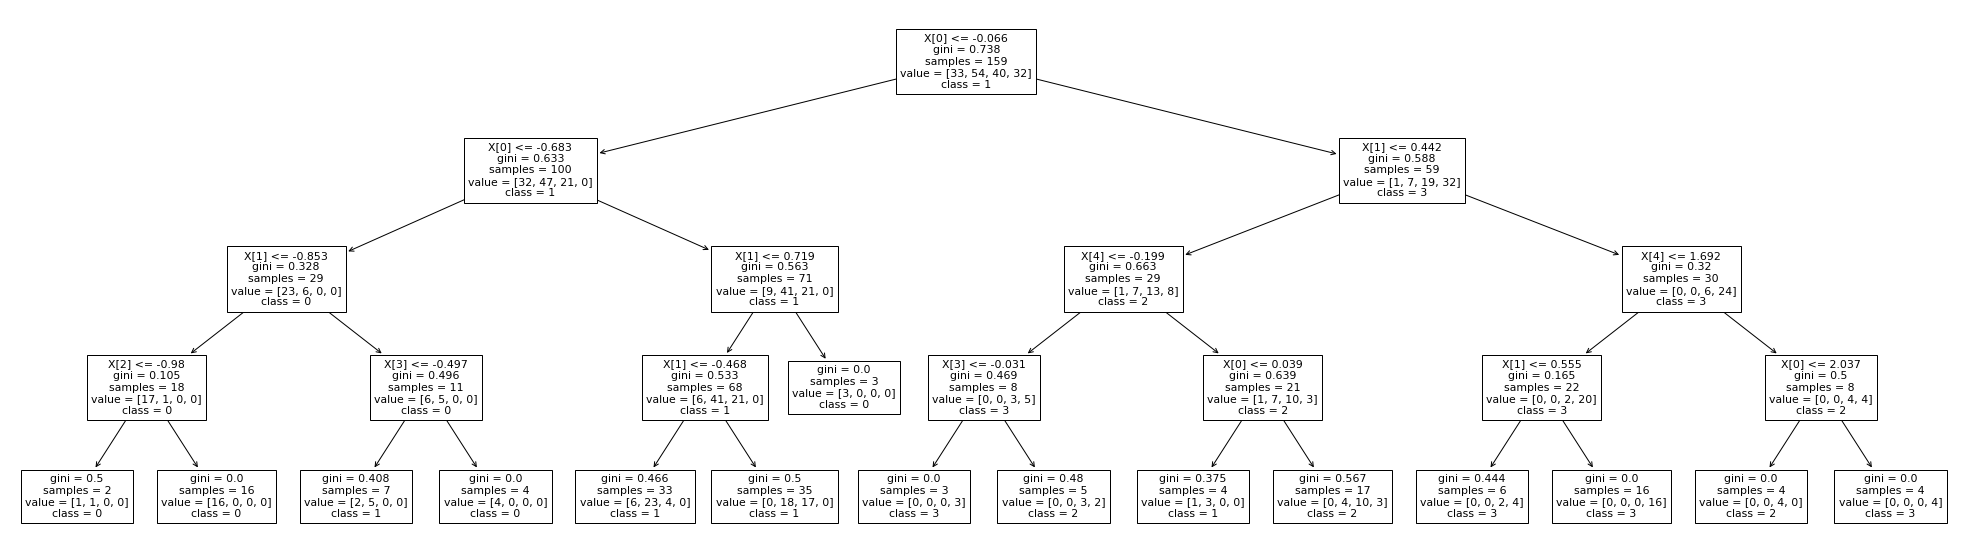

In [3]:
#decision tree (find useful features)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

features=df.iloc[:,0:5]
target=labels

#normalize
features=preprocessing.scale(features)

X_train,X_test, y_train, y_test =train_test_split(features,target,test_size=0.3,random_state=1)
model=DecisionTreeClassifier(max_depth=4,random_state=1)
model.fit(X_train, y_train)
ypredict=model.predict(X_test)

#show result
print("accuracy:",model.score(X_test, y_test))
fig=plt.figure(figsize=(35,10))
print("confusion matrix:")
print(confusion_matrix(y_test, ypredict))
print("precision score of each label",precision_score(y_test,ypredict,average=None))
print("recall score of each label",recall_score(y_test,ypredict,average=None))

_=tree.plot_tree(model,class_names=['0','1','2','3'])

In [4]:
#random forest
from sklearn.ensemble import RandomForestClassifier

features=df.iloc[:,0:5]
target=labels

#normalize
features=preprocessing.scale(features)

X_train,X_test, y_train, y_test =train_test_split(features,target,test_size=0.3,random_state=1)
model=RandomForestClassifier(n_estimators = 200,random_state=1)
model.fit(X_train, y_train)
ypredict=model.predict(X_test)

#show result
print("accuracy:",model.score(X_test, y_test))
print("confusion matrix:")
print(confusion_matrix(y_test, ypredict))
print("precision score of each label",precision_score(y_test,ypredict,average=None))
print("recall score of each label",recall_score(y_test,ypredict,average=None))

accuracy: 0.7391304347826086
confusion matrix:
[[11  1  0  0]
 [ 1 15  5  1]
 [ 0  2  6  3]
 [ 0  2  3 19]]
precision score of each label [0.91666667 0.75       0.42857143 0.82608696]
recall score of each label [0.91666667 0.68181818 0.54545455 0.79166667]


In [5]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

features=df.iloc[:,0:5]
target=labels

#normalize
features=preprocessing.scale(features)

X_train,X_test, y_train, y_test =train_test_split(features,target,test_size=0.3,random_state=1)
model=KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
ypredict=model.predict(X_test)

#show result
print("accuracy:",model.score(X_test, y_test))
print("confusion matrix:")
print(confusion_matrix(y_test, ypredict))
print("precision score of each label",precision_score(y_test,ypredict,average=None))
print("recall score of each label",recall_score(y_test,ypredict,average=None))

accuracy: 0.7246376811594203
confusion matrix:
[[11  1  0  0]
 [ 2 16  4  0]
 [ 0  3  7  1]
 [ 0  2  6 16]]
precision score of each label [0.84615385 0.72727273 0.41176471 0.94117647]
recall score of each label [0.91666667 0.72727273 0.63636364 0.66666667]


In [6]:
#Linear Regression
from sklearn.linear_model import LinearRegression

features=df.iloc[:,0:5]
target=df.iloc[:,5]

#normalize
features=preprocessing.scale(features)

X_train,X_test, y_train, y_test =train_test_split(features,target,test_size=0.3,random_state=1)
model=LinearRegression()
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

average_err=0
average_rev=0
average_predict=0
revenue=[]

#calculate error rate
for i in range(len(y_predict)):
    revenue.append(y_test.iloc[i])
    error=y_predict[i]-y_test.iloc[i]
    average_predict+=y_predict[i]
    if error < 0:
        error=(-error)
    average_err+=error
    average_rev+=y_test.iloc[i]
average_err=average_err/len(y_predict)
average_rev=average_rev/len(y_predict)
average_predict=average_predict/len(y_predict)
#show result
print("average predict $:",average_predict)
print("average revenue $:",average_rev)
print("average error $:",average_err)
print("average error %:",average_err/average_rev)

average predict $: 2405.796835814003
average revenue $: 2716.6036666666664
average error $: 736.7348635119678
average error %: 0.27119703641420684


In [11]:
#Predict other youtuber's revenue

#dataset owner: Holywater
#https://youtube.com/channel/UCTcFZIhUzvUR9c1HxDaQ1tg

data="holywater.csv"

df2=pd.read_csv(data,sep=',')
df2=df2.drop(columns=['Video title'])
df2=df2.drop(columns=['Video publish time'])
df2=df2.drop(columns=['Video'])
#df=df.drop(columns=['Dislikes'])
df2=df2.drop(columns=['Comments added'])
df2=df2.drop(columns=['Shares'])
df2=df2.drop(columns=['YouTube ad revenue (TWD)'])
#df=df.drop(columns=['Subscribers gained'])
#df=df.drop(columns=['Likes'])
df2=df2.dropna()

#normalize with the same scale of previous set
df3=pd.concat([df,df2])
features=df3.iloc[:,0:5]
features=preprocessing.scale(features)

y_predict=model.predict(features)

#show result
for i in range(238):
    if i >227:
        print("video",i-227,":",y_predict[i])


video 1 : 2266.9774957541636
video 2 : 1515.4884148283722
video 3 : 1347.0614004801228
video 4 : 1521.0581568750547
video 5 : 1717.3185997186922
video 6 : 1691.544310546653
video 7 : 1108.8236293301413
video 8 : 1283.855016389203
video 9 : 1011.2395734583631
video 10 : 1317.8417397587734
